In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
from tqdm.autonotebook import tqdm
import os
import cftime
import json
from dask import array

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [1]:
def tcr_classic(ts_expt, ts_ctrl):
    m_expt = np.mean(ts_expt[0,60*12:80*12])
    m_ctrl = np.mean(ts_ctrl[0,60*12:80*12])
    std_expt = np.std(np.random.choice(ts_expt[0,60*12:80*12], 10000))
    std_ctrl = np.std(np.random.choice(ts_expt[0,60*12:80*12], 10000))
    return m_expt - m_ctrl, np.sqrt(np.sum(np.square([std_expt,std_ctrl])))

In [3]:
def load(*keys):
    test = lambda fname: all([k in fname for k in keys])
    ns = np.array([[f, np.load('data/'+f, allow_pickle = True)] for f in os.listdir('data') if test(f)])
    return ns

Plot 30-year moving average $\Delta T$  for 1pctCO2 runs
=======

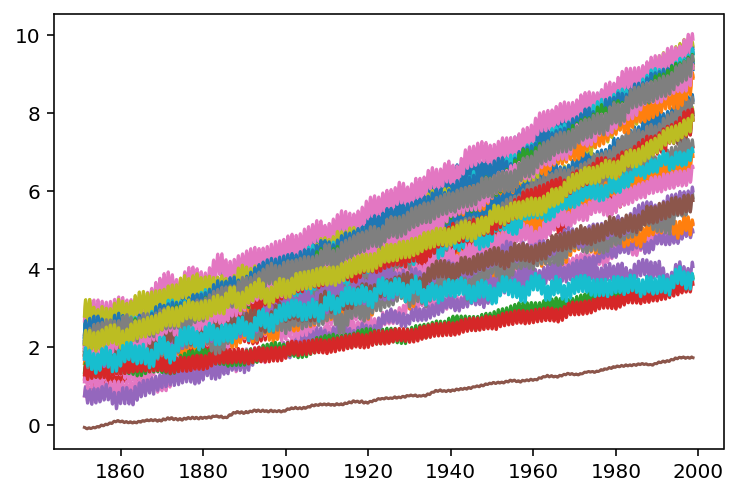

In [21]:
ts = load("1pctCO2",'_ts.npy')
dates = [d for d in [pd.to_datetime(n[1], errors='coerce') for n in ns[:,1]] if d[0] != 'NaT']
plt.figure("1pctCO2 runs")
for f, n in ts:
    w = 30
    d = next(d for d in dates if len(d) == len(n[0]))
    plt.plot_date(d[int(w/2)-1:int(len(n[0])-w/2)],
                  moving_average(n[0] - n[0,0], w),
                  xdate=True, fmt='-')

Plot 30-year moving average $\Delta T$  for abrupt-4x runs
=======

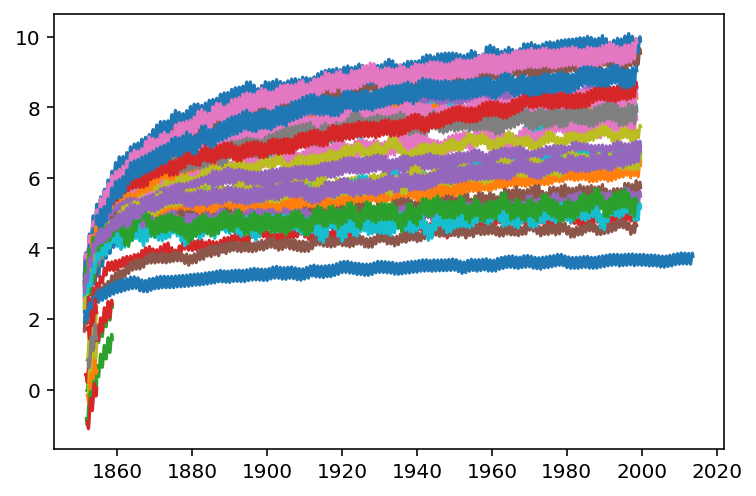

In [19]:
ts = load("abrupt-4xCO2",'_ts.npy')
dates = [d for d in [pd.to_datetime(n[1], errors='coerce') for n in ns[:,1]] if d[0] != 'NaT']
plt.figure("abrupt-4x runs")
for f, n in ns:
    w = 30
    d = next(d for d in dates if len(d) == len(n[0]))
    plt.plot_date(d[int(w/2)-1:int(len(n[0])-w/2)],
                  moving_average(n[0] - n[0,0], w),
                  xdate=True, fmt='-')

In [7]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w    

In [28]:
titles = pd.DataFrame(name.split('_')[0:3] + [name.split('_')[3].replace('.npy','')] for name in os.listdir('data'))
titles

,0,1,2,3
0,FGOALS-g3,piControl,r1i1p1f1,ts
1,CAMS-CSM1-0,abrupt-4xCO2,r2i1p1f1,rsdt
2,BCC-CSM2-MR,piControl,r1i1p1f1,ts
3,CNRM-CM6-1,abrupt-4xCO2,r2i1p1f2,rsdt
4,ACCESS-ESM1-5,piControl,r1i1p1f1,tos
...,...,...,...,...
375,GISS-E2-1-G,1pctCO2,r1i1p1f1,ts
376,IPSL-CM6A-LR,abrupt-4xCO2,r2i1p1f1,tos
377,MRI-ESM2-0,abrupt-4xCO2,r4i1p1f1,rsdt
378,MRI-ESM2-0,abrupt-4xCO2,r7i1p1f1,rsdt


In [25]:
titles

,0,1,2,3
0,FGOALS-g3,piControl,r1i1p1f1,ts.npy
1,CAMS-CSM1-0,abrupt-4xCO2,r2i1p1f1,rsdt.npy
2,BCC-CSM2-MR,piControl,r1i1p1f1,ts.npy
3,CNRM-CM6-1,abrupt-4xCO2,r2i1p1f2,rsdt.npy
4,ACCESS-ESM1-5,piControl,r1i1p1f1,tos.npy
...,...,...,...,...
375,GISS-E2-1-G,1pctCO2,r1i1p1f1,ts.npy
376,IPSL-CM6A-LR,abrupt-4xCO2,r2i1p1f1,tos.npy
377,MRI-ESM2-0,abrupt-4xCO2,r4i1p1f1,rsdt.npy
378,MRI-ESM2-0,abrupt-4xCO2,r7i1p1f1,rsdt.npy
